# Differential Analysis

Import everything from the imports notebook. This reads in all of the expression data as well as the functions needed to analyse differential expression data.

In [1]:
import NotebookImport
from Imports import *

importing IPython notebook from Imports

In [2]:
import seaborn as sns
sns.set_context('paper',font_scale=1.5)
sns.set_style('white')

__matched_meth__ is our matched methylation data.

In [3]:
store = '/data_ssd/TCGA_methylation_2014_04_16.h5'
matched_meth = pd.read_hdf(store, 'matched_tn')
matched_meth = matched_meth.groupby(axis=1, level=[0,1]).first()

In [4]:
matched_meth.T.head(10).T.head()

TCGA-05-5420        TCGA-18-3417        TCGA-18-4721        TCGA-18-5592        TCGA-18-5595      
                             01    11            01    11            01    11            01    11            01    11
Hybridization REF                                                                                                    
cg00000029                 0.38  0.18          0.23  0.18          0.31  0.24          0.17  0.25          0.16  0.16
cg00000165                 0.15  0.11          0.51  0.15          0.40  0.15          0.74  0.14          0.80  0.18
cg00000236                 0.85  0.92          0.91  0.85          0.87  0.88          0.91  0.90          0.90  0.89
cg00000289                 0.71  0.75          0.73  0.77          0.64  0.81          0.67  0.76          0.74  0.77
cg00000292                 0.75  0.71          0.67  0.69          0.77  0.68          0.51  0.68          0.59  0.69

Read in matched Gene and miRNA expression data.

In [5]:
matched_rna = pd.read_hdf('/data_ssd/RNASeq_2014_07_15.h5', 'matched_tn')
matched_mir = pd.read_hdf('/data_ssd/miRNASeq_2014_07_15.h5', 'matched_tn')

###Run a simple screen for DX probes 
* Here we take the matched data and run a basic screen
* fc = 1 means that we have no foldchange buffer for a gene to be considered over or underexpressed in a patient 
* If there are ties or missing data, I omit these from the test.  This can cause underpowered tests which have extreme test statistics but weak p-values.  For this reason I filter all gene/probes/markers with a sample size of less than 300 patients.

In [6]:
dx_rna = binomial_test_screen(matched_rna, fc=1.)
dx_rna = dx_rna[dx_rna.num_dx > 300]

In [7]:
dx_rna.ix[['ADH1A','ADH1B','ADH1C']]

,num_ox,num_dx,frac,p
ADH1A,37,646,0.06,1.76e-134
ADH1B,28,650,0.04,4.71e-147
ADH1C,73,649,0.11,6.41e-98


In [8]:
dx_rna.shape

(18419, 4)

In [9]:
dx_rna.p.rank().ix[['ADH1A','ADH1B','ADH1C']]

ADH1A      8
ADH1B      1
ADH1C    154
Name: p, dtype: float64

In [10]:
dx_rna.sort('p').head(10)

,num_ox,num_dx,frac,p
ADH1B,28,650,0.04,4.71e-147
IQGAP3,619,650,0.95,4.20e-143
KIF4A,618,650,0.95,8.14e-142
FOXM1,617,650,0.95,1.53e-140
GSTM5,34,650,0.05,2.78e-139
PKMYT1,615,650,0.95,4.90e-138
UBE2C,613,650,0.94,1.39e-135
ADH1A,37,646,0.06,1.76e-134
CDT1,612,650,0.94,2.25e-134
TROAP,612,650,0.94,2.25e-134


In [11]:
plt.rcParams['savefig.dpi'] = 150

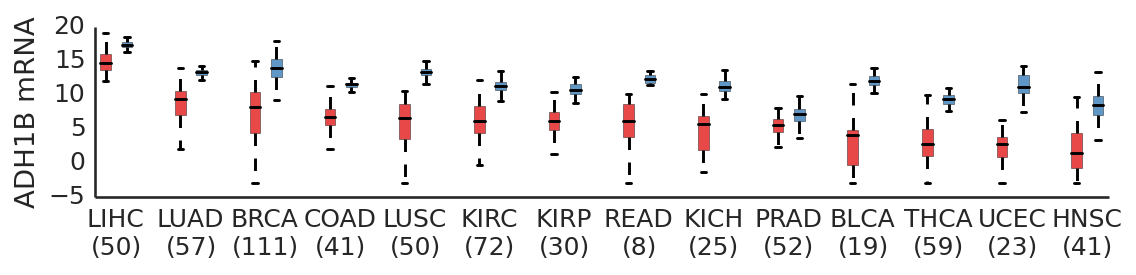

In [12]:
fig, ax = subplots(figsize=(7.75,2.))
paired_bp_tn_split(matched_rna.ix['ADH1B'], codes, data_type='mRNA',
                   ax=ax)
fig.tight_layout()
fig.savefig('/cellar/users/agross/figures/ADH1B.pdf')

In [55]:
dx_mir = binomial_test_screen(matched_mir, fc=1.)
dx_mir = dx_mir[dx_mir.num_dx > 300]

In [56]:
dx_mir.sort('p').head()

,num_ox,num_dx,frac,p
hsa-mir-21,581,628,0.93,4.12e-118
hsa-mir-139,66,628,0.11,5.01e-99
hsa-mir-133a-1,99,628,0.16,6.71e-72
hsa-mir-1307,528,628,0.84,3.56e-71
hsa-mir-145,101,628,0.16,1.86e-70


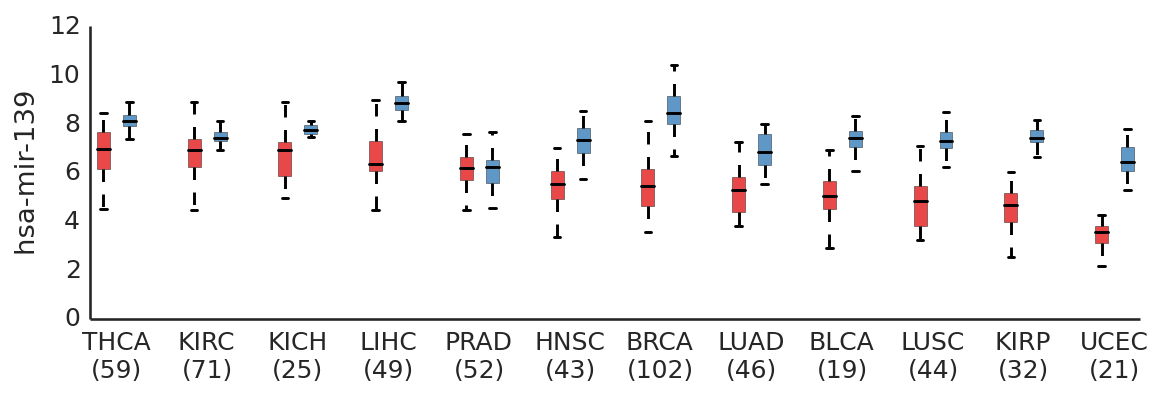

In [57]:
paired_bp_tn_split(matched_mir.ix['hsa-mir-139'], codes, data_type='')

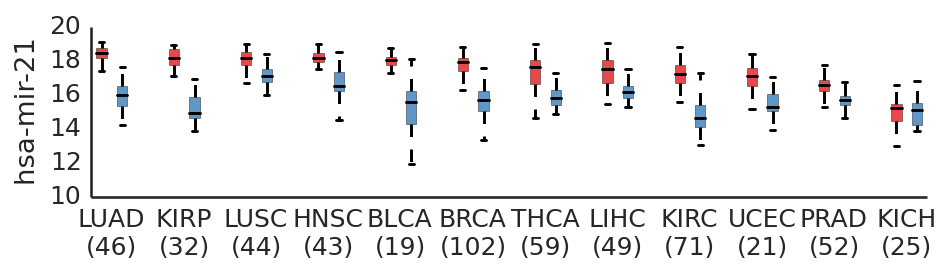

In [64]:
fig, ax = subplots(figsize=(6.5,2.))
paired_bp_tn_split(matched_mir.ix['hsa-mir-21'], codes, data_type='',
                   ax=ax)
fig.tight_layout()
fig.savefig('/cellar/users/agross/figures/mir21.pdf')

In [59]:
dx_meth = binomial_test_screen(matched_meth, fc=1.)
dx_meth = dx_meth[dx_meth.num_dx > 300]

In [60]:
dx_meth.sort('p').head()

,num_ox,num_dx,frac,p
Hybridization REF,,,,
cg10216717,22,704,0.03,6.95e-171
cg06570224,680,704,0.97,5.87e-168
cg12597389,679,704,0.96,1.60e-166
cg27166177,27,704,0.04,1.05e-163
cg17811434,29,704,0.04,5.94e-161


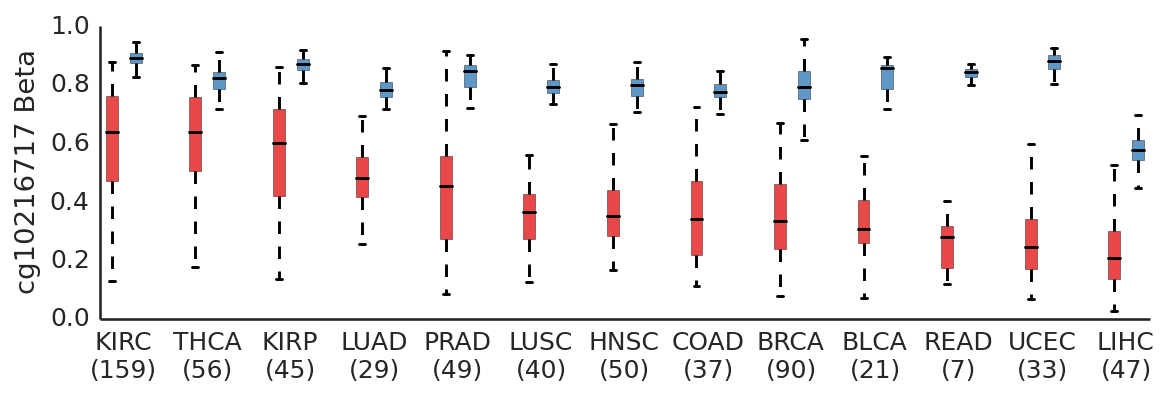

In [61]:
paired_bp_tn_split(matched_meth.ix['cg10216717'], codes, data_type='Beta')

We are going to want to reuse this plot so here I'm wrapping it in a function.

In [62]:
def fig_1e(ax):
    draw_dist(dx_meth.frac, ax=ax, lw=2.5)
    draw_dist(dx_rna.frac, ax=ax, lw=2.5, bins=200)
    draw_dist(dx_mir.frac, ax=ax, lw=2.5, bins=100)


    ax.set_yticks([])
    ax.set_xticks([0,.5,1])
    ax.set_ylabel('Density')
    ax.set_xlabel('Fraction')
    ax.legend(('Methylation','mRNA','miRNA'), frameon=False)
    prettify_ax(ax)
    return ax

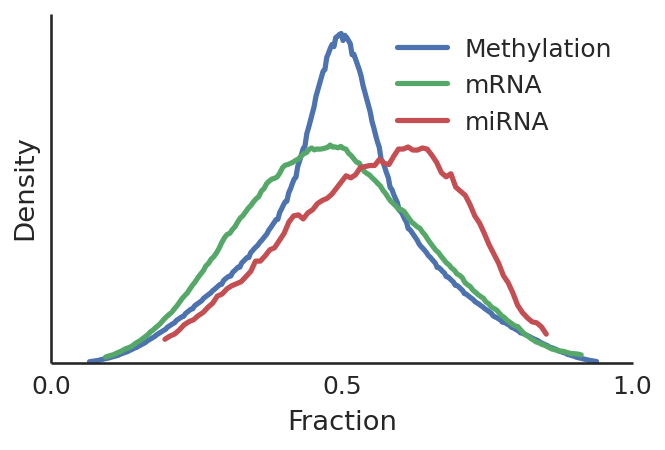

In [63]:
#Do not import
fig, ax = subplots(1,1, figsize=(5,3))
fig_1e(ax);

### Pathway and Gene Annotation Analysis

In [67]:
gs2 = gene_sets.ix[dx_rna.index].fillna(0)

In [68]:
rr = screen_feature(dx_rna.frac, rev_kruskal, gs2.T, 
                    align=False)
fp = (1.*gene_sets.T * dx_rna.frac).T.dropna().replace(0, np.nan).mean().order()
fp.name = 'mean frac'

Overexpressed pathways

In [69]:
rr.ix[ti(fp > .5)].join(fp).sort('p').head()

,H,p,q,mean frac
REACTOME_CELL_CYCLE_MITOTIC,260.31,1.47e-58,1.22e-55,0.65
REACTOME_MITOTIC_M_M_G1_PHASES,178.90,8.41e-41,3.50e-38,0.69
REACTOME_GENE_EXPRESSION,160.35,9.48e-37,2.63e-34,0.57
REACTOME_S_PHASE,157.14,4.77e-36,9.93e-34,0.70
REACTOME_CELL_CYCLE_CHECKPOINTS,153.10,3.64e-35,6.05e-33,0.69


Underexpressed pathways

In [70]:
rr.ix[ti(fp < .5)].join(fp).sort('p').head()

,H,p,q,mean frac
REACTOME_BIOLOGICAL_OXIDATIONS,50.47,1.21e-12,1.98e-11,0.38
REACTOME_PHASE_1_FUNCTIONALIZATION_OF_COMPOUNDS,43.64,3.95e-11,5.36e-10,0.34
KEGG_FATTY_ACID_METABOLISM,43.62,3.99e-11,5.36e-10,0.31
KEGG_DRUG_METABOLISM_CYTOCHROME_P450,43.12,5.14e-11,6.78e-10,0.35
REACTOME_DOWNSTREAM_EVENTS_IN_GPCR_SIGNALING,38.79,4.71e-10,5.94e-09,0.43


I am folling up on Fatty Acid Metabolism as opposed to biological oxidations, because it has a larger effect size, although the smaller gene-set size gives it a less extreme p-value.

In [71]:
def fig_1f(ax):
    v = pd.concat([dx_rna.frac, 
                   dx_rna.frac.ix[ti(gs2['REACTOME_CELL_CYCLE_MITOTIC']>0)],
                   dx_rna.frac.ix[ti(gs2['KEGG_FATTY_ACID_METABOLISM']>0)]])

    v1 = pd.concat([pd.Series('All Genes', dx_rna.frac.index), 
                    pd.Series('Cell Cycle\nMitotic',
                              ti(gs2['REACTOME_CELL_CYCLE_MITOTIC']>0)),
                    pd.Series('Fatty Acid\nMetabolism', 
                              ti(gs2['KEGG_FATTY_ACID_METABOLISM']>0))])
    v1.name = ''
    v.name = 'Fraction Overexpressed'
    violin_plot_pandas(v1, v, ann=None, ax=ax)
    prettify_ax(ax)
    return ax

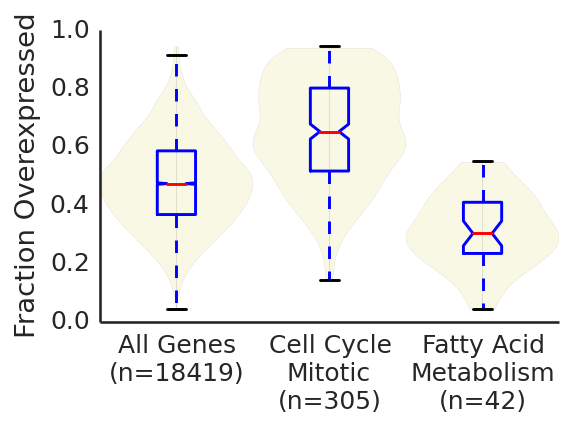

In [72]:
#Do not import
fig, ax = subplots(1,1, figsize=(4,3))
fig_1f(ax)
fig.tight_layout()
fig.savefig('/cellar/users/agross/figures/gsea.pdf')

#### I need to wrap my methylation helper functions into a package

In [73]:
os.chdir('../Methlation/')

In [74]:
import Setup.DX_Imports as DX

importing IPython notebook from Setup/DX_Imports

importing IPython notebook from Setup/Imports

Populating the interactive namespace from numpy and matplotlib


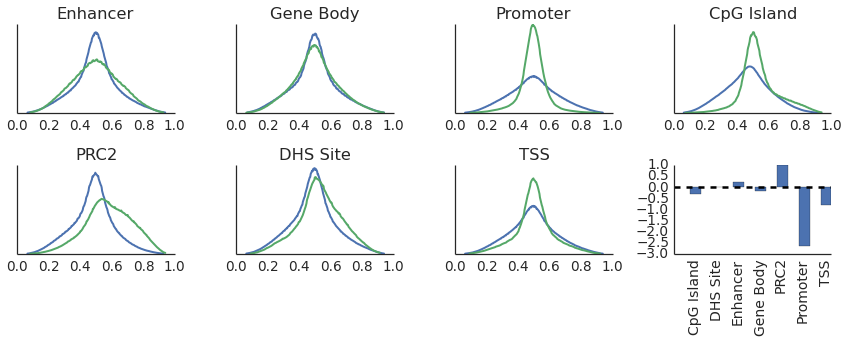

In [75]:
#Do not import
fig, axs = subplots(2,4, figsize=(12,5))
axs = axs.flatten()
for i,p in enumerate(DX.probe_sets.keys()):
    draw_dist(dx_meth.frac, DX.probe_sets[p], ax=axs[i])
    axs[i].legend().set_visible(False)
    axs[i].set_yticks([])
    axs[i].set_title(p)
    prettify_ax(axs[i])
f_odds = pd.DataFrame({f: fisher_exact_test((dx_meth.frac - .5).abs() > .25, v)
                      for f,v in DX.probe_sets.iteritems()}).T
np.log2(f_odds.odds_ratio).plot(kind='bar', ax=axs[-1])
prettify_ax(axs[-1])
fig.tight_layout()

In [76]:
def fig_1g(ax):
    lw = 2.5
    draw_dist(dx_meth.frac.ix[ti(DX.probe_sets['Promoter'])], ax=ax, lw=lw)
    draw_dist(dx_meth.frac.ix[ti(DX.probe_sets['CpG Island'])], ax=ax, lw=lw)
    draw_dist(dx_meth.frac.ix[ti(DX.probe_sets['PRC2'])], ax=ax, lw=lw)
    draw_dist(dx_meth.frac, ax=ax, colors='grey', lw=lw)
    ax.set_yticks([])
    ax.set_xticks([0,.5,1])
    ax.set_ylabel('Density')
    ax.set_xlabel('Fraction with Increased Methylation')
    ax.legend(('Promoter','CpG Island','PRC2','All Probes'))
    prettify_ax(ax)
    return ax

In [79]:
plt.rcParams['savefig.dpi'] = 150

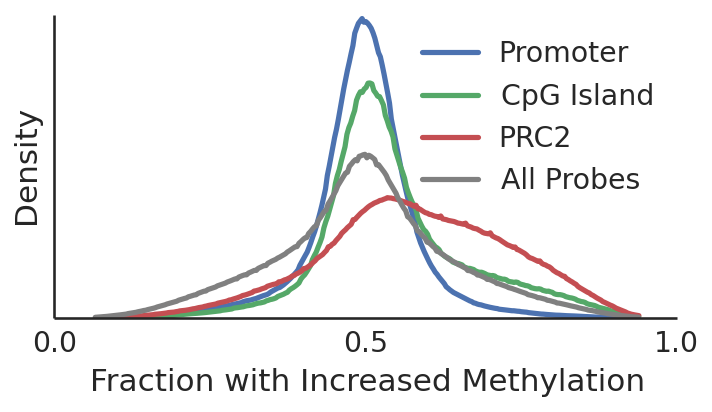

In [81]:
#Do not import
fig, ax = subplots(1,1, figsize=(5,3))
fig_1g(ax);
fig.tight_layout()
fig.savefig('/cellar/users/agross/figures/fx_enrichment.pdf')

### Merge Bottom Half of Figure 1

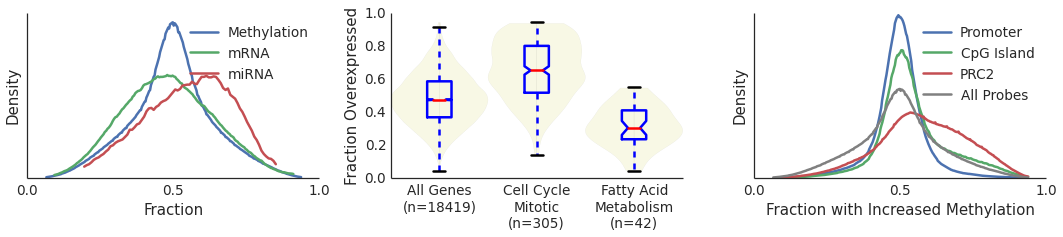

In [32]:
#Do not import
fig, axs = subplots(1,3, figsize=(15,3.5))
fig_1e(axs[0])
fig_1f(axs[1])
fig_1g(axs[2])
fig.tight_layout()
fig.savefig('/cellar/users/agross/figures/fig1_bottom.png', dpi=300)